In [1]:
import itertools
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
plt.style.use("seaborn-colorblind")
markers = list(Line2D.markers.keys())
prop_cycle = plt.rcParams["axes.prop_cycle"]
default_colours = prop_cycle.by_key()["color"]

alpha=0.5
temp2colour = {'HDOCK':default_colours[0], 'af_full':default_colours[1], 'comb_full':default_colours[2], 'esm_full':default_colours[3], 'fullaf_full':default_colours[4], 'fullesm_full':default_colours[5], 'msaaf_full':default_colours[0], 'omega_full':default_colours[1],'truth_full':default_colours[2]}
temp2name={"HDOCK":"HDOCK","af_full":"AF2","comb_full":"Comb","esm_full":"ESM",'msaaf_full':"MSA","fullaf_full":"None" ,"omega_full":"Omega", "truth_full":"PDB"}

hatches = ["", "/", "\\", "|", "-", "x", "o", "+", "O", ".", "*"]
default_hatches = [
    "".join(combi) for combi in list(itertools.product(hatches, hatches))[1:]
]

/tmp/ipykernel_1508920/1201156441.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


In [2]:
from multimer_table import read_scores
from pathlib import Path
import os
import pandas as pd

def get_colabfold_result(
    parent_path: Path, template_id: str,
) -> dict:
    outputs = []
    for identifier in ["af_full", "comb_full", "esm_full", "omega_full", "fullaf_full", "fullesm_full", "HDOCK", "msaaf_full", "truth_full",]: #"af_single_pred",]:
        folder_path = Path(f"{str(parent_path)}_{identifier}/{template_id}/scores.json")
        #colabfold_results = read_colabfold_scores(folder_path)
        basic_info = {
            "identifier": identifier,
            "template_id": template_id,
        }
        if folder_path.exists():
            score = read_scores(folder_path)
            outputs.append(basic_info | score)
    df = pd.DataFrame(outputs)
    return df

outputs = []
for template_id in os.listdir("dips100"):
    if template_id.endswith("fasta") or template_id.endswith("truth"):
        continue
    result = get_colabfold_result("dips100", template_id)
    if not result is None:
        outputs.append(result)
df = pd.concat(outputs)
df

,identifier,template_id,rmsd,tm_score,lddt,dockq_scores
0,af_full,0nqm,19.164532,0.446826,0.000502,0.03
1,comb_full,0nqm,16.316832,0.464733,0.000553,0.03
2,esm_full,0nqm,19.133585,0.444473,0.000449,0.022
3,omega_full,0nqm,18.676731,0.424945,0.000483,0.022
4,fullaf_full,0nqm,14.905008,0.354286,0.000895,0.028
5,fullesm_full,0nqm,17.651186,0.445218,0.000986,0.03
6,HDOCK,0nqm,18.232195,0.507125,0.002269,0.02
7,msaaf_full,0nqm,19.181030,0.446887,0.000492,0.03
8,truth_full,0nqm,15.665474,0.480151,0.000548,0.028
0,af_full,1a9w,9.555381,0.768736,0.001274,0.026


In [3]:
mean_df=df.groupby(["identifier"], dropna=False).apply(lambda g: g.mean(skipna=True)).add_suffix("_mean")
variance_df=df.groupby(["identifier"], dropna=False).apply(lambda g: g.std(skipna=True)).add_suffix("_variance")
grouped_df = pd.concat([mean_df, variance_df], axis=1, join="inner")
grouped_df

/tmp/ipykernel_1508920/3178921827.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_df=df.groupby(["identifier"], dropna=False).apply(lambda g: g.mean(skipna=True)).add_suffix("_mean")
/tmp/ipykernel_1508920/3178921827.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variance_df=df.groupby(["identifier"], dropna=False).apply(lambda g: g.std(skipna=True)).add_suffix("_variance")


,rmsd_mean,tm_score_mean,lddt_mean,dockq_scores_mean,rmsd_variance,tm_score_variance,lddt_variance,dockq_scores_variance
identifier,,,,,,,,
HDOCK,9.373250,0.811485,0.294790,0.283298,9.880836,0.230365,0.391703,0.296704
af_full,14.812847,0.658934,0.312687,0.113637,8.562709,0.182335,0.389049,0.230423
comb_full,16.479080,0.615777,0.301069,0.098444,8.837681,0.205189,0.374445,0.203064
esm_full,16.968515,0.602121,0.299003,0.081889,8.855717,0.200179,0.374345,0.178823
fullaf_full,23.990860,0.296153,0.144398,0.020815,7.362705,0.087542,0.181726,0.028606
fullesm_full,18.058575,0.633799,0.288237,0.079556,6.676472,0.203188,0.391243,0.162090
msaaf_full,14.739258,0.680480,0.322010,0.147963,8.827545,0.189346,0.394788,0.273939
omega_full,16.871324,0.591358,0.291937,0.101000,8.630642,0.203181,0.369273,0.212421
truth_full,15.013333,0.679198,0.328334,0.116062,8.332085,0.175214,0.408978,0.243646


hey


[]

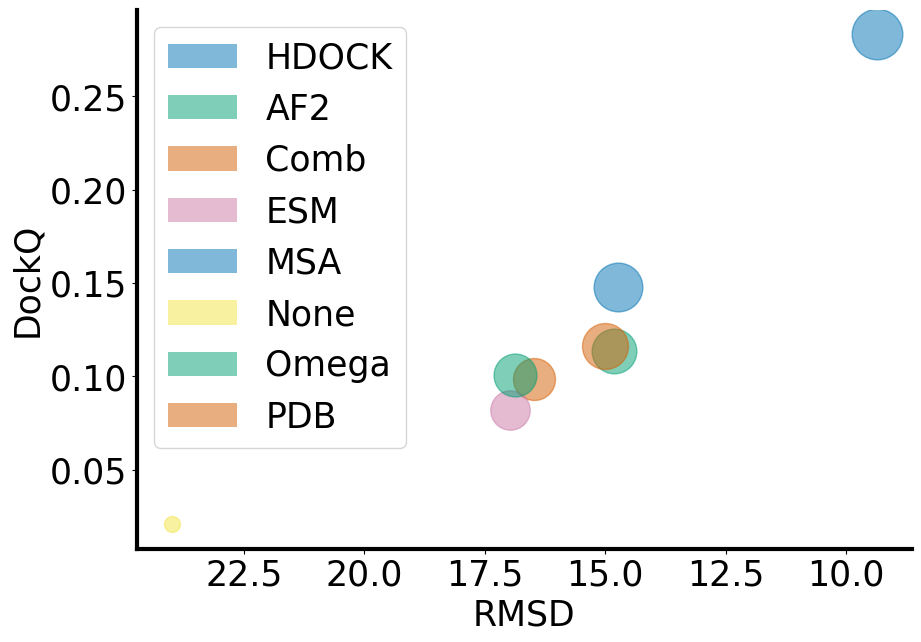

In [4]:
import matplotlib

matplotlib.rcParams.update({'font.size': 25})
matplotlib.rcParams['figure.figsize'] = (10, 7)
for name, row in grouped_df.iterrows():
    if name=="fullesm_full":
        print("hey")
        continue
    plt.scatter(row["rmsd_mean"], row["dockq_scores_mean"], s=row["dockq_scores_variance"]*4500, c=temp2colour[name], alpha=alpha)
plt.ylabel("DockQ")
plt.xlabel("RMSD")
plt.gca().invert_xaxis()
colour_elements = [Patch(facecolor=temp2colour[name], label=number, alpha=alpha) for name, number in temp2name.items()]
plt.legend(handles=colour_elements)
plt.gca().spines["bottom"].set_linewidth(3)
plt.gca().spines["left"].set_linewidth(3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig('figures/ppi.png',bbox_inches="tight", transparent=True)
plt.savefig('figures/ppi.svg',bbox_inches="tight", transparent=True)
plt.plot()